# Gradient Descent

We will consider a linear model with two inputs and one binary output. In the first step we will derive, by hand, the equations for gradient descent for three different loss functions. Next, we will implement these two algorithms and run them on the iris dataset.

For a linear model $f(x) = x_1 * w_1 + x_2 * w_2 + b$ and a binary output $y$ ($y=0$ or $y=1$), let the cost function be $E(f(x), y)$.

The three cost functions we're considering are:

1) $E(f(x), y) = - I_{f(x) * y' < 0} f(x) * y'$ 

similar to perceptron, but since $y \in \{0,1\}$ we set $y' = 2y - 1 \therefore y' \in \{1,-1\}$

2) quadratic error $E(f(x), y) = \frac{1}{2} (f(x) - y)^2$

3) sigmoid cross entropy $E(f(x), y) = - y \ln (sigm(f(x))) - (1-y) \ln (1-sigm(f(x))$ where $sigm$ is the sigmoid function $sigm(x) = \frac{1}{1+e^{-x}}$.

## 1. Derivation

Derive, by hand, the equations for gradient descent (the gradient wrt the error) for each of the parameters ($w_1$, $w_2$, and $b$) for each of the three cost functions. What do you notice about 1)?

### Answer

We need to calculate the derivative with respect to our parameters $\theta$ ($\theta \in \{w_1, w_2, b\}$). We will use the chain rule to break down our derivatives into two parts:

$$\frac{\partial E}{\partial \theta} = \frac{\partial E}{\partial f}\frac{\partial f}{\partial \theta}$$


We can easily calculate the second part, the partial derivative wrt our function $f$:


$$\frac{\partial f}{\partial b} = 1$$

$$\frac{\partial f}{\partial w_i} = x_i, i \in {1,2}$$ 


now we need to calculate the first part, the partial derivate of the cost wrt to our function. We will do this for all three of our cost functions:

#### 1) Hinge loss $E(f(x), y) = - I_{f(x) * y' < 0} \big( f(x) * y' \big)$

There are two cases here: when the indicator function is 1 and when it is 0. When it is $0$ our output is $0$, and our derivative $\frac{\partial}{\partial f}0 = 0$. When it is 1, our output is $- f * y'$. and therefore our derivative $\frac{\partial}{\partial f}( -f * y') = -y'$. We can put these together and get:

$$\frac{\partial E}{\partial f} = I_{f * y'< 0} \big( -y' \big)$$

Combining this with part 2:

$\frac{\partial E}{\partial w_i} = x_i I_{f * y' < 0} \big( -y' \big)$ 
and
$\frac{\partial E}{\partial b} = I_{f * y' < 0} \big( -y' \big)$

*This is our perceptron learning rule again!*

#### 2) Squared Error $E(f(x), y) = \frac{1}{2} (f(x) - y)^2$

$\frac{\partial E}{\partial f} = (f - y)$ 

Combining this with part 2:

$\frac{\partial E}{\partial w_i} = x_i (f(x) - y)$ et
$\frac{\partial E}{\partial b} = f(x) - y$

#### 3) Sigmoid Cross Entropy $E(f(x), y) = - y \ln (sigm(f(x))) - (1-y) \ln (1-sigm(f(x))$

We will simplify things a bit by letting $p(f) = sigm(f)$. Then we'll break down our derivative using the chain rule 
$$\frac{\partial E}{\partial f} = \frac{\partial E}{\partial p} \frac{\partial p}{\partial f}$$

Now we're going to try to find the first part of this derivative:

$$\frac{\partial E}{\partial p} = \frac{\partial}{\partial p} \big( - y \ln (p) - (1-y) \ln (1-p) \big)$$
$$ = -y \frac{1}{p} - (-1) (1 - y) \frac{1}{1-p}$$
$$ = \frac{-y (1 - p) + (1 - y) p}{p(1-p)} = \frac{p - y}{p(1-p)}$$

To solve the second piece we can use the knowledge that $\frac{\partial sigm}{\partial x} = sigm(x) ( 1 - sigm(x))$ So $\frac{\partial p}{\partial f} = p (1-p)$. Now putting everything together:

$$\frac{\partial E}{\partial f} = \frac{\partial E}{\partial p} \frac{\partial p}{\partial f}$$
$$\frac{\partial E}{\partial f} = \frac{p - y}{p(1-p)} * p(1-p) $$
$$ = p - y $$
$$ = sigm(f) - y$$

Combining this with part 2:

$\frac{\partial E}{\partial w_i} = x_i (sigm(f(x)) - y)$ and
$\frac{\partial E}{\partial b} = sigm(f(x)) - y$


## 2. Implementation

### Data Preprocessing

For our binary classification problem, we will only use two classes: iris class 1 and 2. We will preprocess the dataset to extract only examples of these two classes, and for simplicity we will change their labels to be 1 and 0. As well, since we only have two inputs per example, we will only be using two features of each example.

Here is the code for the preprocessing:

In [19]:
%pylab inline
import numpy as np

iris = np.loadtxt('iris.txt')
data = iris

# extract only data with class label 1 or 2
data = data[data[:,-1]<3,:]

# change label 2 to be 0
data[data[:,-1]==2,-1] = 0

# we will use only features 2 and 3
train_cols = [2,3]

target_ind = [data.shape[1] - 1]

n_classes = 2
n_train = 75

# we set the random seed to make our results deterministic
# (same results across runs)
np.random.seed(2)

inds = np.arange(data.shape[0])
np.random.shuffle(inds)
train_inds = inds[:n_train]
test_inds = inds[n_train:]
    
# separate into train and test
train_set = data[train_inds,:] 
train_set = train_set[:,train_cols + target_ind]
test_set = data[test_inds,:]
test_set = test_set[:,train_cols + target_ind]

# normalize to mean 0 and standard deviation 1
mu1 = train_set[:,0].mean()
mu2 = train_set[:,1].mean()
sigma1 = train_set[:,0].std()
sigma2 = train_set[:,1].std()
train_set[:,0] -= mu1
train_set[:,1] -= mu2
train_set[:,0] /= sigma1
train_set[:,1] /= sigma2
test_set[:,0] -= mu1
test_set[:,1] -= mu2
test_set[:,0] /= sigma1
test_set[:,1] /= sigma2

# split test into inputs and labels
train_inputs = train_set[:,:-1]
train_labels = train_set[:,-1]
test_inputs = test_set[:,:-1]
test_labels = test_set[:,-1]


# the base class of our models
class Model:

    def plot_function(self, train_data, title):
        plt.figure()
        d1 = train_data[train_data[:, -1] == 1]
        d2 = train_data[train_data[:, -1] == 0]
        plt.scatter(d1[:, 0], d1[:, 1], c='b', label='class 1')
        plt.scatter(d2[:, 0], d2[:, 1], c='g', label='class 0')
        x = np.linspace(-10, 10, 100)
        y = (0.5 - self.weights[0]*x - self.bias)/self.weights[1]
        plt.plot(x, y, c='r', lw=2, label='y = (0.5 - w1*x - b1)/w2')
        plt.xlim(np.min(train_data[:, 0]) - 0.5, np.max(train_data[:, 0]) + 0.5)
        plt.ylim(np.min(train_data[:, 1]) - 0.5, np.max(train_data[:, 1]) + 0.5)
        plt.grid()
        plt.legend(loc='lower right')
        plt.title(title)
        plt.show()

Populating the interactive namespace from numpy and matplotlib


## LinearRegression and SigmoidCrossEntropy

We introduce the classes *LinearRegression* (quadratic error) and *SigmoidCrossEntropy* (sigmoid cross-entropy). As usual, there is a *train* method to train on the train set, and a *compute_predictions* method which computes predictions for the test set

Using the gradients we computed earlier, write the training loop for each of the classes in *train* and write the predictions computation in *compute_predictions* (remember to use *self.max_iter* to make sure that your algorithm doesn't run forever)

In [20]:
class LinearRegression(Model):
    def __init__(self, alpha, max_iter):
        self.alpha = alpha
        self.max_iter = max_iter
    
    def train(self, inputs, labels):
        self.weights = np.random.randn(inputs.shape[1])
        self.bias = np.zeros(1)

        for i in range(self.max_iter):
            diff = np.dot(inputs, self.weights) + self.bias - labels
            # using [:, None] to add an extra dimension
            grad_w = np.mean(diff[:, None] * inputs, axis=0)
            grad_b = np.mean(diff)

            self.weights -= self.alpha * grad_w
            self.bias -= self.alpha * grad_b

    def compute_predictions(self, test_inputs):
        return np.dot(test_inputs, self.weights) + self.bias


class SigmoidCrossEntropy(Model):
    def __init__(self, alpha, max_iter):
        self.alpha = alpha
        self.max_iter = max_iter
    
    def train(self, inputs, labels):
        self.weights = np.random.randn(inputs.shape[1])
        self.bias = np.zeros(1)
        
        for i in range(self.max_iter):
            f = np.dot(inputs, self.weights) + self.bias
            sig_of_f = 1 / (1 + np.exp(-f))
            diff = sig_of_f - labels
            # using [:, None] to add an extra dimension
            grad_w = np.mean(diff[:, None] * inputs, axis=0)
            grad_b = np.mean(diff)

            self.weights -= self.alpha * grad_w
            self.bias -= self.alpha * grad_b

    def compute_predictions(self, test_data):
        return np.dot(test_data, self.weights) + self.bias

### Train and Test

Once the classes above are complete, run the code below to train and test your models

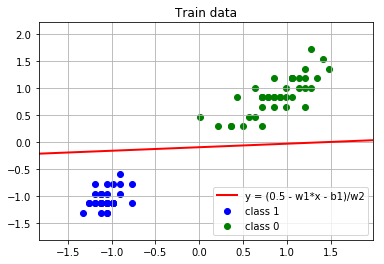

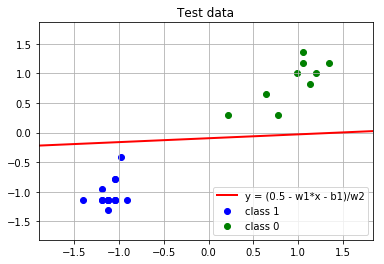

Test error is  0.0 %


In [23]:
# learning rate
alpha = 0.01

# max number of iteration
max_iter = 500

# create and train the model
model = LinearRegression(alpha, max_iter)
model.train(train_inputs, train_labels)
model.plot_function(train_set, 'Train data')

# predict the class for the test examples
predictions = model.compute_predictions(test_inputs)
# convert the predictions to either false (0) or true (1)
classes_pred = predictions > 0.5


model.plot_function(test_set, 'Test data')

# calculate error
err = 1.0 - np.mean(test_labels==classes_pred)
print("Test error is ", 100.0 * err, "%")

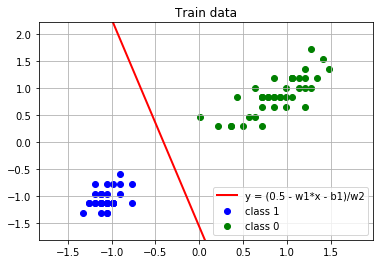

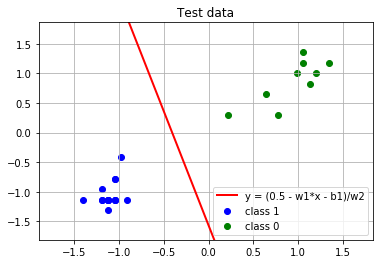

Test error is  0.0 %


In [24]:
# create and train the model
model = SigmoidCrossEntropy(alpha, max_iter)
model.train(train_inputs, train_labels)
model.plot_function(train_set, 'Train data')

# predict the class for the test examples
predictions = model.compute_predictions(test_inputs)
# convert the predictions to either false (0) or true (1)
classes_pred = predictions > 0.5

# calculate error
err = 1.0 - np.mean(test_labels==classes_pred)

model.plot_function(test_set, 'Test data')
print("Test error is ", 100.0 * err, "%")